In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Colab_data/INE

/content/drive/MyDrive/Colab_data/INE


In [5]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
import re
import matplotlib.pyplot as plt

In [6]:
files = glob.glob("/content/drive/MyDrive/Colab_data/INE/*.txt")

In [7]:
date = []
date_ = []
files_ = []
for i,file in enumerate(files):
  date.append(re.findall(r'\d+',file)[0])

temp = sorted(range(len(date)), key = date.__getitem__)

for i in temp:
  date_.append(date[i])
  print(date[i], files[i])
  files_.append(files[i])

20190930 /content/drive/MyDrive/Colab_data/INE/DatosAbiertos-DERFE-pdln_edms_sexo_20190930.txt
20191031 /content/drive/MyDrive/Colab_data/INE/DatosAbiertos-DERFE-pdln_edms_sexo_20191031.txt
20191130 /content/drive/MyDrive/Colab_data/INE/DatosAbiertos-DERFE-pdln_edms_sexo_20191130.txt
20191231 /content/drive/MyDrive/Colab_data/INE/DatosAbiertos-DERFE-pdln_edms_sexo_20191231.txt
20200131 /content/drive/MyDrive/Colab_data/INE/DatosAbiertos-DERFE-pdln_edms_sexo_20200131_Nal_Ext.txt
20200229 /content/drive/MyDrive/Colab_data/INE/DatosAbiertos-DERFE-pdln_edms_sexo_20200229_Nal_Ext.txt
20200331 /content/drive/MyDrive/Colab_data/INE/DatosAbiertos-DERFE-pdln_edms_sexo_20200331_Nal_Ext.txt
20200430 /content/drive/MyDrive/Colab_data/INE/DatosAbiertos-DERFE-pdln_edms_sexo_20200430_Nal_Ext.txt
20200531 /content/drive/MyDrive/Colab_data/INE/DatosAbiertos-DERFE-pdln_edms_sexo_20200531_Nal_Ext.txt
20200630 /content/drive/MyDrive/Colab_data/INE/DatosAbiertos-DERFE-pdln_edms_sexo_20200630_Nal_Ext.txt
20

In [8]:
for i,file in enumerate(files_):
  data = pd.read_csv(file)
  data = data[1:]
  data = data[data['ENTIDAD']==11][1:]
  mpo = data.groupby(['MUNICIPIO']).sum()
  if i==0:
    if 'LISTA_NAL' in mpo.columns:
      df_mpo = pd.DataFrame(mpo['LISTA_NAL'])
    if 'LISTA_NACIONAL' in mpo.columns:
      df_mpo = pd.DataFrame(mpo['LISTA_NACIONAL'])
    if 'LISTA' in mpo.columns:
      df_mpo = pd.DataFrame(mpo['LISTA'])
  else:
    if 'LISTA_NAL' in mpo.columns:
      df_mpo[date_[i]]=mpo['LISTA_NAL']
    if 'LISTA_NACIONAL' in mpo.columns:
      df_mpo[date_[i]]=mpo['LISTA_NACIONAL']
    if 'LISTA' in mpo.columns:
        df_mpo[date_[i]]=mpo['LISTA']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df_mpo

,LISTA,20191031,20191130,20191231,20200131,20200229,20200331,20200430,20200531,20200630,20200731,20200831,20200930,20201031,20201130,20201231
MUNICIPIO,,,,,,,,,,,,,,,,
1,67427,67541,67450,67463,65505,66245,66750,66736.0,68057,68054,68052,68093,68244,68241,68422,68611
2,94040,94139,93825,93970,91712,92759,93343,93340.0,94967,94967,94952,95009,95209,95595,96005,95934
3,128446,128937,128731,128978,125884,127461,128544,128543.0,130720,130717,130708,130992,131172,131903,132669,133489
4,49656,49787,49699,49818,48907,49311,49596,49596.0,50283,50281,50273,50287,50324,50647,50867,50877
5,67868,68120,67992,68218,66789,67553,68063,68058.0,69125,69124,69114,69132,69287,69745,70072,70194
6,4207,4228,4203,4200,4145,4162,4212,4212.0,4244,4244,4244,4249,4253,4245,4262,4261
7,378361,379387,378139,378402,370594,374915,378228,378153.0,383007,383002,382980,383071,383484,385535,386714,387848
8,31431,31546,31501,31455,30822,31080,31406,31385.0,31800,31799,31797,31818,31816,32043,32435,32565
9,60267,60366,60337,60325,58753,59504,59917,59910.0,60931,60931,60929,60987,61077,61486,61679,61915


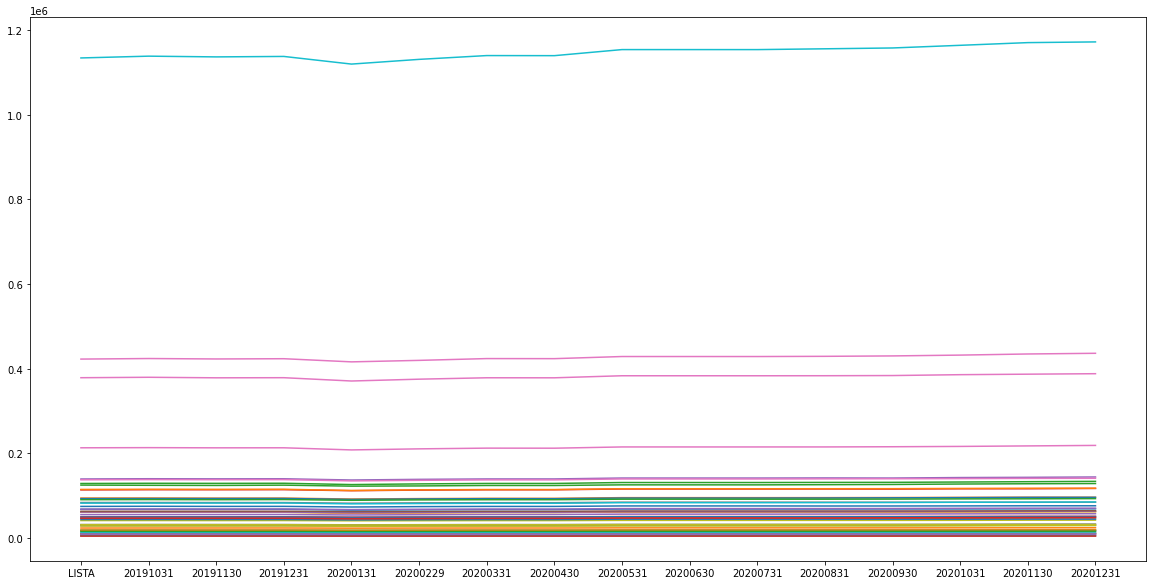

In [9]:
plt.figure(figsize=(20,10))
for i in range(46):
  plt.plot(df_mpo.iloc[i])

In [13]:
for i,file in enumerate(files_):
  data = pd.read_csv(file)
  data = data[1:]
  data = data[data['ENTIDAD']==11][1:]
  sec = data.groupby(['SECCION']).sum()
  if i==0:
    if 'LISTA_NAL' in sec.columns:
      df_sec = pd.DataFrame(sec['LISTA_NAL'])
    if 'LISTA_NACIONAL' in sec.columns:
      df_sec = pd.DataFrame(sec['LISTA_NACIONAL'])
    if 'LISTA' in sec.columns:
      df_sec = pd.DataFrame(sec['LISTA'])
  else:
    if 'LISTA_NAL' in sec.columns:
      df_sec[date_[i]]=sec['LISTA_NAL']
    if 'LISTA_NACIONAL' in sec.columns:
      df_sec[date_[i]]=sec['LISTA_NACIONAL']
    if 'LISTA' in sec.columns:
        df_sec[date_[i]]=sec['LISTA']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df_sec

,LISTA,20191031,20191130,20191231,20200131,20200229,20200331,20200430,20200531,20200630,20200731,20200831,20200930,20201031,20201130,20201231
SECCION,,,,,,,,,,,,,,,,
1,1539,1545,1539,1538,1493,1515,1527,1527.0,1552,1552,1552.0,1557.0,1562.0,1561.0,1565.0,1571.0
2,1998,2008,2004,2005,1939,1963,1977,1977.0,2026,2026,2026.0,2024.0,2034.0,2028.0,2028.0,2033.0
3,1522,1522,1525,1520,1457,1477,1493,1493.0,1531,1531,1531.0,1529.0,1533.0,1528.0,1534.0,1537.0
4,945,949,949,952,915,932,938,938.0,957,957,957.0,959.0,961.0,959.0,962.0,957.0
5,1067,1065,1065,1064,1026,1036,1047,1045.0,1072,1072,1072.0,1071.0,1076.0,1073.0,1067.0,1068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,1556,1560,1578,1582,1588,1601,1615,1615.0,1616,1616,1616.0,1618.0,1619.0,1624.0,1644.0,1646.0
3151,1336,1343,1336,1336,1329,1343,1352,1352.0,1365,1365,1365.0,1363.0,1366.0,1381.0,1384.0,1391.0
3152,1074,1080,1085,1086,1080,1094,1095,1095.0,1107,1107,1107.0,1110.0,1112.0,1112.0,1118.0,1125.0


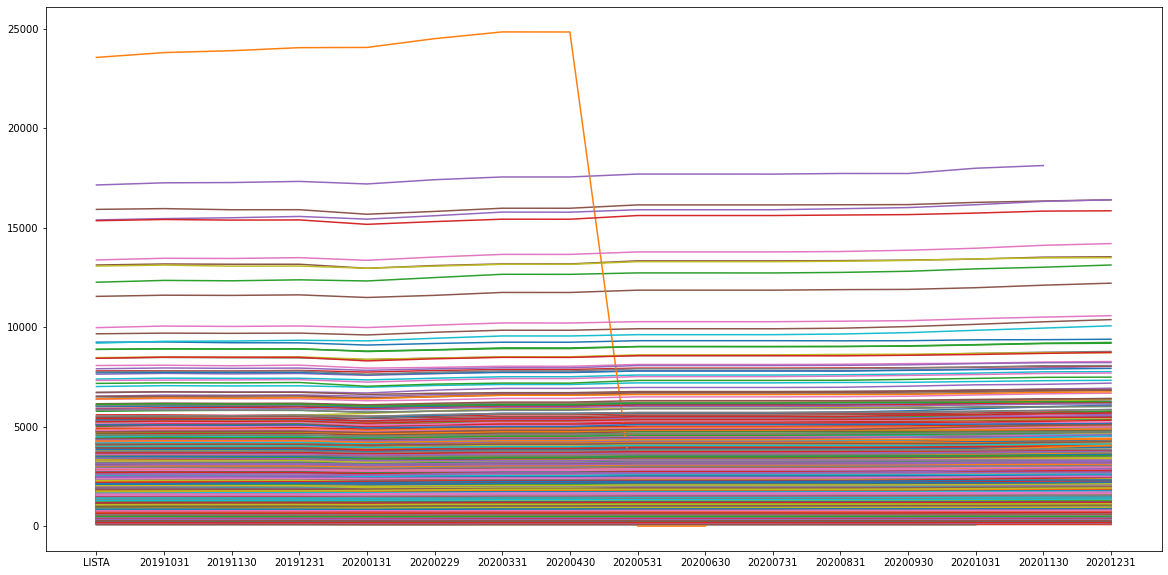

In [15]:
plt.figure(figsize=(20,10))
for i in range(len(df_sec)):
  plt.plot(df_sec.iloc[i])

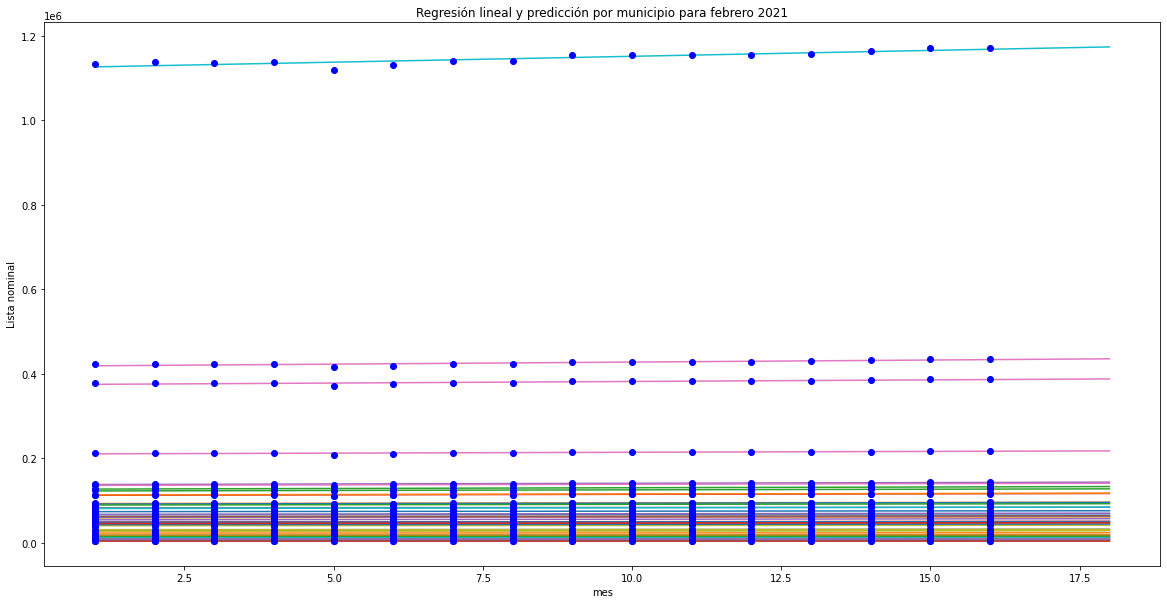

In [92]:
model = LinearRegression()
x = np.linspace(1,16,16).reshape(-1,1)
y = np.asarray(df_mpo)
m = []
b = []
R_sq = []
y_predict = []
y_feb = []
y_sum_feb = 0
plt.figure(figsize=(20,10))
plt.title('Regresión lineal y predicción por municipio para febrero 2021')
for i in range (len(df_mpo)):
  model.fit(x,y[i])
  R_sq = model.score(x, y[i])
  y_predict = model.predict(x)
  b = model.intercept_
  m = model.coef_
  x_feb = np.asarray([18]).reshape(-1,1)
  y_feb = model.predict(x_feb)
  x_new = np.array(np.concatenate([x, x_feb]))
  y_new = np.array(np.concatenate([y_predict, y_feb]))
  plt.plot(x_new, y_new,)
  plt.plot(x, y[i], 'bo')
  plt.xlabel('mes')
  plt.ylabel('Lista nominal')
  y_sum_feb += y_feb

In [93]:
print('Suma de lista nominal por municipio para febrero 2021 = ', int(y_sum_feb))

Suma de lista nominal por municipio para febrero 2021 =  4537691


In [94]:
print('Total de casillas para febrero de 2021 = ', int(y_sum_feb/750))

Total de casillas para febrero de 2021 =  6050
